# Actividad 12: Solución numérica de la Ecuación de Poisson

Librerías utilizadas.

In [2]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# Ejercicio 1.

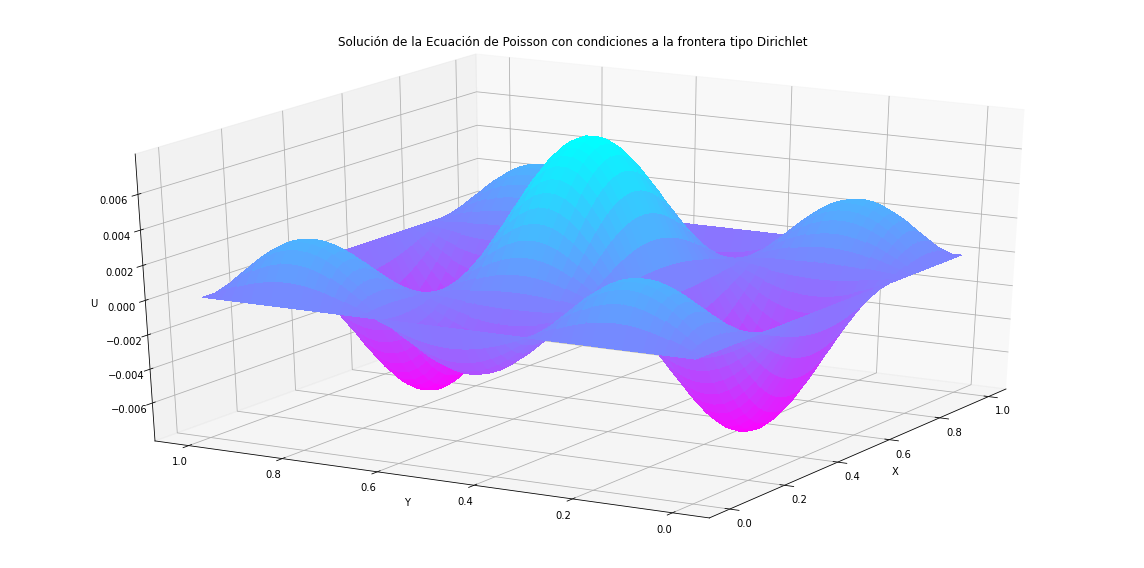

In [12]:
def rhs_func(x, y, M):
    
    g = (np.multiply(np.cos(2*np.pi*X[1:-1,1:-1]), np.sin(3*np.pi*Y[1:-1,1:-1]))).flatten()
    f = [g[i::M-2] for i in range(M-2)] 
    f = np.asarray(f).flatten() 
    return f


def bc_dirichlet(x, y, m):
    
    lBC = np.zeros((M,1)).flatten()
    leftBC = lBC[1:M-1]
    
    rBC = np.zeros((M,1)).flatten()
    rightBC = rBC[1:M-1]
    
    tBC = np.zeros((1,M)).flatten()
    topBC = tBC[1:M-1]
    
    bBC = np.zeros((1,M)).flatten()
    bottomBC = bBC[1:M-1]
    
    g1 = np.zeros(((M-2)**2, 1)).flatten()
    
    for i in range(M-2):
        g1[(M-2)*i] = topBC[i] 
    
    for j in range(M-2):
        g1[(M-2)*(j+1)-1] = bottomBC[j]
    
    k1 = np.zeros((len(leftBC),1))
    k1[0] = 1.0
    leftBCk = sparse.kron(k1,leftBC).toarray().flatten()
    
    k2 = np.zeros((len(rightBC),1))
    k2[-1] = 1.0
    rightBCk = sparse.kron(k2,rightBC).toarray().flatten()
    
    g = g1 + leftBCk + rightBCk
    
    return [g, lBC, tBC, rBC, bBC]
    

def generate_lhs_matrix(M, hx, hy):
    
    alpha = hx**2/hy**2

    main_diag = 2 * (1 + alpha) * np.ones((M - 2, 1)).ravel()
    off_diag = -1 * np.ones((M - 2, 1)).ravel()
    
    a = main_diag.shape[0]

    diagonals = [main_diag, off_diag, off_diag]

    B = sparse.diags(diagonals, [0, -1, 1], shape=(a, a)).toarray()
    
    C = sparse.diags([-1*np.ones((M+1, 1)).ravel()], [0], shape=(a,a)).toarray()
        
    e1 = sparse.eye(M-2).toarray()
    
    A1 = sparse.kron(e1,B).toarray()
    
    e2 = sparse.diags([1*np.ones((M, 1)).ravel(),1*np.ones((M, 1)).ravel()], [-1,1], shape=(M-2,M-2)).toarray()
    
    A2 = sparse.kron(e2,C).toarray()
    
    mat = A1 + A2

    return mat



M = 50
(x0, xf) = (0.0, 1.0)
(y0, yf) = (0.0, 1.0)

hx = (xf - x0)/(M-1)
hy = (yf - y0)/(M-1)

x1 = np.linspace(x0, xf, M)
y1 = np.linspace(y0, yf, M)

X, Y = np.meshgrid(x1, y1)

frhs = rhs_func(X, Y, M)

fbc = bc_dirichlet(X, Y, M)

rhs = frhs*(hx**2) + fbc[0]

A = generate_lhs_matrix(M, hx, hy)

V = np.linalg.solve(A,rhs)

V = V.reshape((M-2, M-2)).T

U = np.zeros((M,M))

U[1:M-1, 1:M-1] = V
U[:,0] = fbc[1]
U[0,:] = fbc[2]
U[:,M-1] = fbc[3]
U[M-1,:] = fbc[4]

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, U, cmap=cm.cool_r, linewidth=0, antialiased=False)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
ax.set_title("Solución de la Ecuación de Poisson con condiciones a la frontera tipo Dirichlet")
plt.tight_layout()
ax.view_init(25, -150)
plt.show()

# Ejercicio 2.

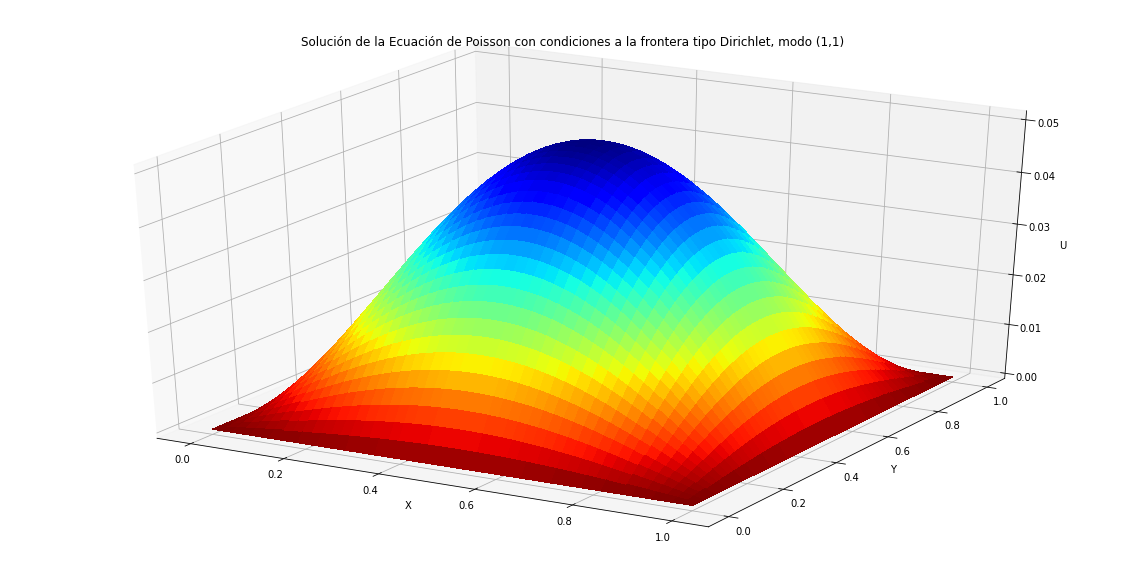

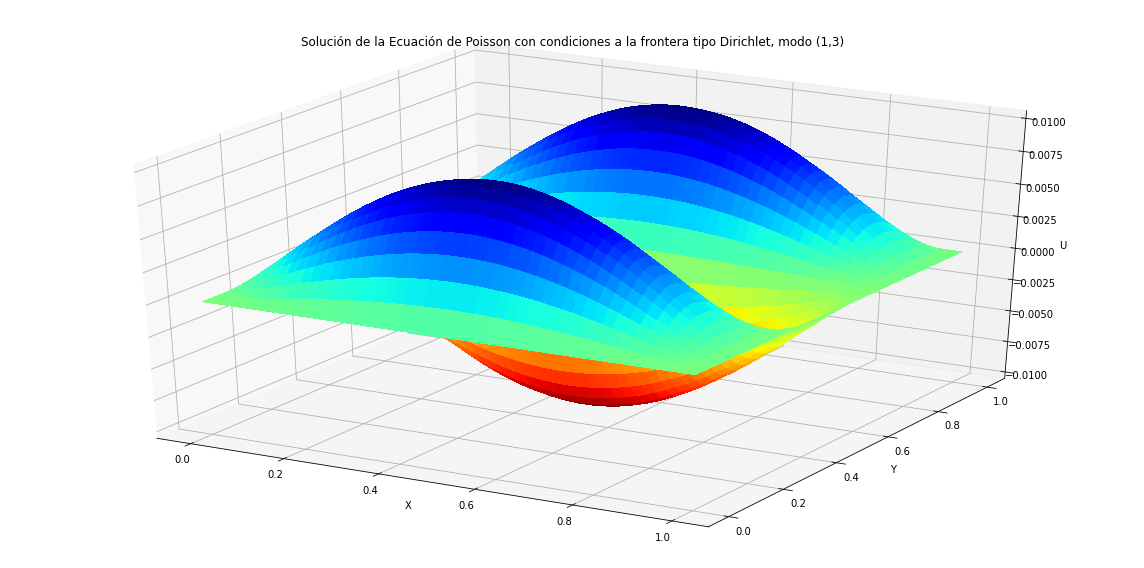

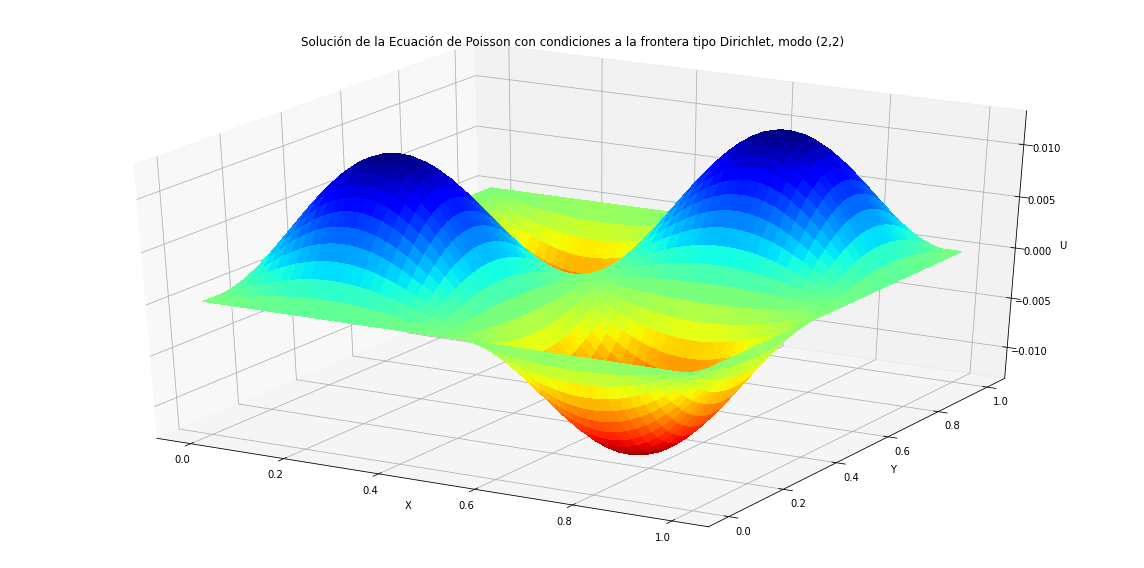

In [14]:
def rhs_func(x, y, M, n, m2):
    
    g = (np.multiply(np.sin(n*np.pi*X[1:-1,1:-1]), np.sin(m2*np.pi*Y[1:-1,1:-1]))).flatten()
    f = [g[i::M-2] for i in range(M-2)] 
    f = np.asarray(f).flatten() 
    return f


def bc_dirichlet(x, y, M):
    
    lBC = np.zeros((M,1)).flatten()
    leftBC = lBC[1:M-1]
    
    rBC = np.zeros((M,1)).flatten()
    rightBC = rBC[1:M-1]
    
    tBC = np.zeros((1,M)).flatten()
    topBC = tBC[1:M-1]
    
    bBC = np.zeros((1,M)).flatten()
    bottomBC = bBC[1:M-1]
    
    g1 = np.zeros(((M-2)**2, 1)).flatten()
    
    for i in range(M-2):
        g1[(M-2)*i] = topBC[i] 
    
    for j in range(M-2):
        g1[(M-2)*(j+1)-1] = bottomBC[j]
    
    k1 = np.zeros((len(leftBC),1))
    k1[0] = 1.0
    leftBCk = sparse.kron(k1,leftBC).toarray().flatten()
    
    k2 = np.zeros((len(rightBC),1))
    k2[-1] = 1.0
    rightBCk = sparse.kron(k2,rightBC).toarray().flatten()
    
    g = g1 + leftBCk + rightBCk
    
    return [g, lBC, tBC, rBC, bBC]
    

def generate_lhs_matrix(M, hx, hy):
    
    alpha = hx**2/hy**2

    main_diag = 2 * (1 + alpha) * np.ones((M - 2, 1)).ravel()
    off_diag = -1 * np.ones((M - 2, 1)).ravel()
    
    a = main_diag.shape[0]

    diagonals = [main_diag, off_diag, off_diag]

    B = sparse.diags(diagonals, [0, -1, 1], shape=(a, a)).toarray()
    
    C = sparse.diags([-1*np.ones((M+1, 1)).ravel()], [0], shape=(a,a)).toarray()
        
    e1 = sparse.eye(M-2).toarray()
    
    A1 = sparse.kron(e1,B).toarray()
    
    e2 = sparse.diags([1*np.ones((M, 1)).ravel(),1*np.ones((M, 1)).ravel()], [-1,1], shape=(M-2,M-2)).toarray()
    
    A2 = sparse.kron(e2,C).toarray()
    
    mat = A1 + A2

    return mat



M = 50
(x0, xf) = (0.0, 1.0)
(y0, yf) = (0.0, 1.0)

hx = (xf - x0)/(M-1)
hy = (yf - y0)/(M-1)

x1 = np.linspace(x0, xf, M)
y1 = np.linspace(y0, yf, M)

X, Y = np.meshgrid(x1, y1)

fbc = bc_dirichlet(X, Y, M)

A = generate_lhs_matrix(M, hx, hy)

frhs1 = rhs_func(X, Y, M, 1, 1)

rhs1 = frhs1*(hx**2) + fbc[0]

V1 = np.linalg.solve(A,rhs1)

V1 = V1.reshape((M-2, M-2)).T

U1 = np.zeros((M,M))

U1[1:M-1, 1:M-1] = V1
U1[:,0] = fbc[1]
U1[0,:] = fbc[2]
U1[:,M-1] = fbc[3]
U1[M-1,:] = fbc[4]

fig1 = plt.figure(figsize=(16,8))
ax1 = fig1.gca(projection='3d')

surf1 = ax1.plot_surface(X, Y, U1, cmap=cm.jet_r, linewidth=0, antialiased=False)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('U')
ax1.set_title("Solución de la Ecuación de Poisson con condiciones a la frontera tipo Dirichlet, modo (1,1)")
plt.tight_layout()
ax.view_init(20, -106)
plt.show()

frhs2 = rhs_func(X, Y, M, 1, 3)

rhs2 = frhs2*(hx**2) + fbc[0]

V2 = np.linalg.solve(A,rhs2)

V2 = V2.reshape((M-2, M-2)).T

U2 = np.zeros((M,M))

U2[1:M-1, 1:M-1] = V2
U2[:,0] = fbc[1]
U2[0,:] = fbc[2]
U2[:,M-1] = fbc[3]
U2[M-1,:] = fbc[4]

fig2 = plt.figure(figsize=(16,8))
ax2 = fig2.gca(projection='3d')

surf2 = ax2.plot_surface(X, Y, U2, cmap=cm.jet_r, linewidth=0, antialiased=False)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('U')
ax2.set_title("Solución de la Ecuación de Poisson con condiciones a la frontera tipo Dirichlet, modo (1,3)")
plt.tight_layout()
ax.view_init(20, -106)
plt.show()

frhs3 = rhs_func(X, Y, M, 2, 2)

rhs3 = frhs3*(hx**2) + fbc[0]

V3 = np.linalg.solve(A,rhs3)

V3 = V3.reshape((M-2, M-2)).T

U3 = np.zeros((M,M))

U3[1:M-1, 1:M-1] = V3
U3[:,0] = fbc[1]
U3[0,:] = fbc[2]
U3[:,M-1] = fbc[3]
U3[M-1,:] = fbc[4]

fig3 = plt.figure(figsize=(16,8))
ax3 = fig3.gca(projection='3d')

surf3 = ax3.plot_surface(X, Y, U3, cmap=cm.jet_r, linewidth=0, antialiased=False)

ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('U')
ax3.set_title("Solución de la Ecuación de Poisson con condiciones a la frontera tipo Dirichlet, modo (2,2)")
plt.tight_layout()
ax.view_init(20, -106)
plt.show()

# Ejercicio 3.

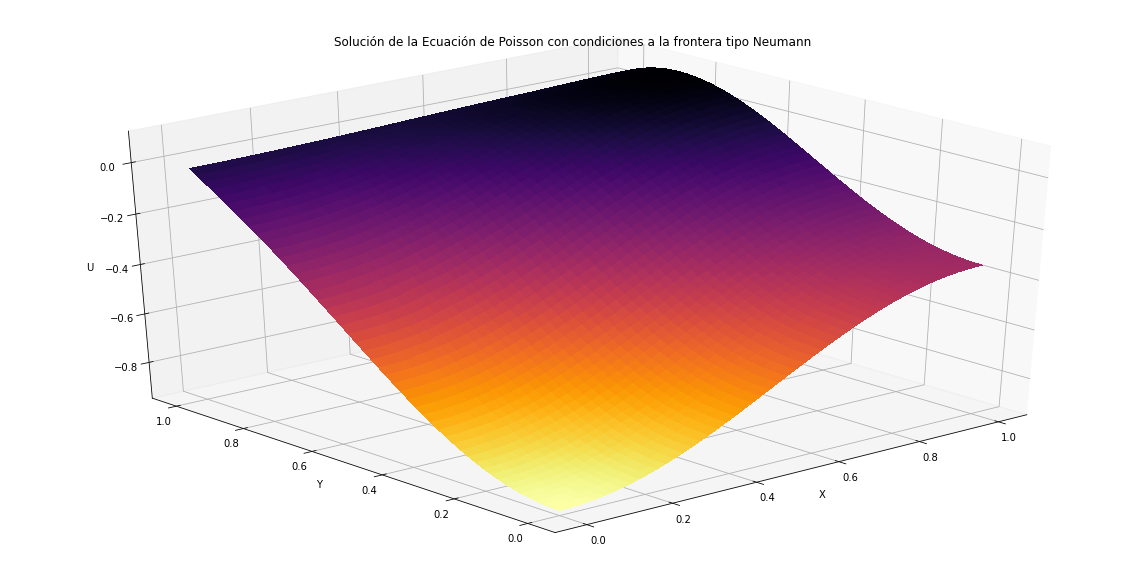

In [16]:
def rhs_func(X, Y, M):
    
    g = (-1*np.pi*np.cos(np.pi*X) - np.pi*np.cos(np.pi*Y)).flatten()
    f = [g[i::M] for i in range(M)]
    f = np.asarray(f).flatten()
    return f
    
  
def generate_lhs_matrix(M, hx, hy):
    alpha = hx**2/hy**2
    
    main_diag = 2*(1+alpha)*np.ones((M, 1)).ravel()
    off_diag = -1*np.ones((M-1, 1)).ravel()
    
    a = main_diag.shape[0]
    
    diagonals = [main_diag, off_diag, off_diag]
    
    B = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
    B[0,1] = -2.0
    
    D = sparse.diags([-1*np.ones((M+1, 1)).ravel()], [0], shape=(a,a)).toarray()
    
    C = sparse.diags([-2*np.ones((M+1, 1)).ravel()], [0], shape=(a,a)).toarray()
    
    e1 = sparse.eye(M).toarray()
    A1 = sparse.kron(e1,B).toarray()
    
    e2 = sparse.diags([1*np.ones((M, 1)).ravel(),1*np.ones((M, 1)).ravel()], [-1,1], shape=(M,M)).toarray()
    e2[0,1] = 0.0
    e2[M-1,M-2] = 0.0
    A2 = sparse.kron(e2,D).toarray()
    
    e3 = sparse.diags([1*np.ones((M, 1)).ravel(),1*np.ones((M, 1)).ravel()], [-1,1], shape=(M,M)).toarray()
    e3[1:M-1,0:M] = 0.0
    A3 = sparse.kron(e3,C).toarray()
    
    mat = A1 + A2 + A3
    
    return mat
    

    
M = 50
(x0, xf) = (0.0, 1.0)
(y0, yf) = (0.0, 1.0)

hx = (xf - x0)/(M-1)
hy = (yf - y0)/(M-1)

X, Y = np.meshgrid(np.linspace(x0, xf, M), np.linspace(y0, yf, M))

f = rhs_func(X, Y, M)

A = generate_lhs_matrix(M, hx, hy)

U = np.linalg.solve(A,f*(hx**2)) 

U = U.reshape((M,M)).T



fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, U, cmap=cm.inferno_r, linewidth=0, antialiased=False)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
ax.set_zlim3d()
ax.set_title("Solución de la Ecuación de Poisson con condiciones a la frontera tipo Neumann")
plt.tight_layout()
ax.view_init(31, -131)
plt.show()

# Ejercicio 4.

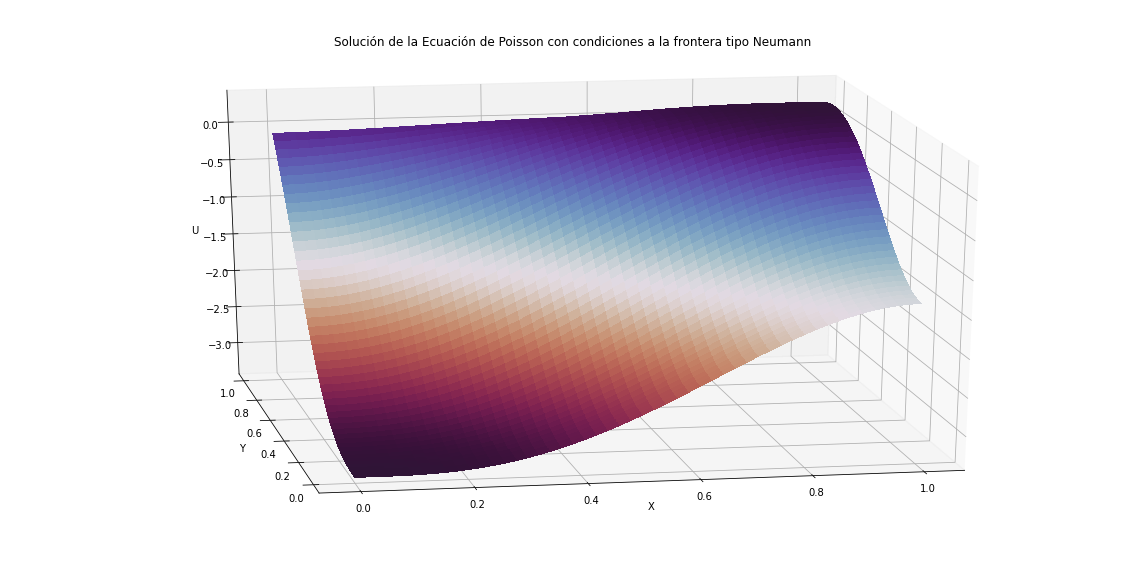

In [20]:
def rhs_func(X, Y, M):

    g = (-2*(np.pi**2)*(np.multiply(np.sin(np.pi*X), np.cos(np.pi*Y))\
                                    +np.multiply(np.cos(np.pi*X),np.sin(np.pi*Y)))).flatten()
    f = [g[i::M] for i in range(M)]
    f = np.asarray(f).flatten()
    return f
    
  
def generate_lhs_matrix(M, hx, hy):
    alpha = hx**2/hy**2
    
    main_diag = 2*(1+alpha)*np.ones((M, 1)).ravel()
    off_diag = -1*np.ones((M-1, 1)).ravel()
    
    a = main_diag.shape[0]
    
    diagonals = [main_diag, off_diag, off_diag]
    
    B = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
    B[0,1] = -2.0
    
    D = sparse.diags([-1*np.ones((M+1, 1)).ravel()], [0], shape=(a,a)).toarray()
    
    C = sparse.diags([-2*np.ones((M+1, 1)).ravel()], [0], shape=(a,a)).toarray()
    
    e1 = sparse.eye(M).toarray()
    A1 = sparse.kron(e1,B).toarray()
    
    e2 = sparse.diags([1*np.ones((M, 1)).ravel(),1*np.ones((M, 1)).ravel()], [-1,1], shape=(M,M)).toarray()
    e2[0,1] = 0.0
    e2[M-1,M-2] = 0.0
    A2 = sparse.kron(e2,D).toarray()
    
    e3 = sparse.diags([1*np.ones((M, 1)).ravel(),1*np.ones((M, 1)).ravel()], [-1,1], shape=(M,M)).toarray()
    e3[1:M-1,0:M] = 0.0
    A3 = sparse.kron(e3,C).toarray()
    
    mat = A1 + A2 + A3
    
    return mat
    

    
M = 50
(x0, xf) = (0.0, 1.0)
(y0, yf) = (0.0, 1.0)

hx = (xf - x0)/(M-1)
hy = (yf - y0)/(M-1)

X, Y = np.meshgrid(np.linspace(x0, xf, M), np.linspace(y0, yf, M))

f = rhs_func(X, Y, M)

A = generate_lhs_matrix(M, hx, hy)

U = np.linalg.solve(A,f*(hx**2)) 

U = U.reshape((M,M)).T



fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, U, cmap=cm.twilight_shifted_r,
                       linewidth=0, antialiased=False)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
ax.set_zlim3d()
ax.set_title("Solución de la Ecuación de Poisson con condiciones a la frontera tipo Neumann")
plt.tight_layout()
ax.view_init(20, -100)
plt.show()